In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2) 
sns.set_style("ticks")


In [9]:
def hoeffding(p_emp,delta,n):
    return p_emp + np.sqrt(np.log(1/delta)/(2*n))


def binary_search(p_emp,_z,n,higher = True):
    z = np.log((n+1)/_z)/n
    def kl(p,q):
        left, right = np.zeros_like(p_emp), np.zeros_like(p_emp)
        
        p_not_one = np.where(p != 1)
        p_not_zero = np.where(p != 0)
        right[p_not_one] = (1-p[p_not_one])* np.log((1-p[p_not_one])/(1-q[p_not_one]))
        left[p_not_zero]  = np.nan_to_num(p[p_not_zero]*np.log(p[p_not_zero]/q[p_not_zero]))
            
        return left + right
    
    if higher:
        pmin = np.ones_like(p_emp)*p_emp
        pmax = np.ones_like(p_emp)
    else:
        pmin = np.zeros_like(p_emp)
        pmax = np.ones_like(p_emp)*p_emp
    
    for i in range(99999):
        p = (pmin + pmax)/2
        diff = kl(p_emp,p) - z
        close = np.isclose(diff,0)

        if np.all(close):
            return p
        
        if higher :
            pmin[diff < 0] = p[diff < 0]
            pmax[diff > 0] = p[diff > 0]
        else:
            pmin[diff > 0] = p[diff > 0]
            pmax[diff < 0] = p[diff < 0]
    return  p

def pinsker(p_emp,delta,n):
    return  p_emp + np.sqrt(np.log((n+1)/delta)/(2*n))
    
def refined_pinsker(p_emp,delta,n):
    return  p_emp + np.sqrt(2*p_emp*np.log((n+1)/delta)/n) + 2*np.log((n+1)/delta)/n



In [10]:
# Finding the values:

delta = 0.01

n = 1000

p_emp = np.linspace(0,1,300)

bound_hoeffding = hoeffding(p_emp,delta,n)
bound_kl = binary_search(p_emp,delta,n)
bound_pinsker = pinsker(p_emp,delta,n)
bound_refined_pinsker = refined_pinsker(p_emp,delta,n)




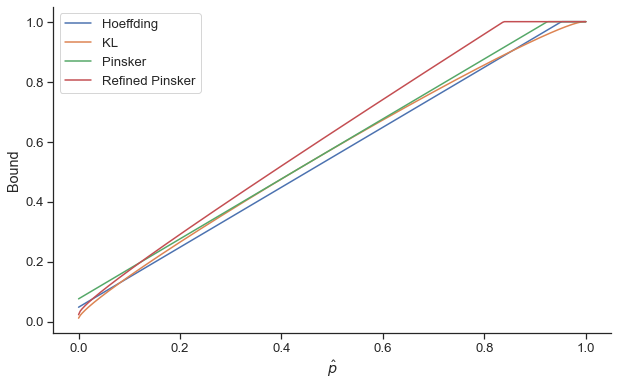

In [11]:
fig, axs = plt.subplots(1,1,figsize = (10,6))

axs.plot(p_emp,np.minimum(bound_hoeffding,1),label = "Hoeffding")
axs.plot(p_emp,np.minimum(bound_kl,1),label = "KL")
axs.plot(p_emp,np.minimum(bound_pinsker,1),label = "Pinsker")
axs.plot(p_emp,np.minimum(bound_refined_pinsker,1),label = "Refined Pinsker")
axs.legend()
sns.despine()
axs.set_ylabel("Bound")
axs.set_xlabel("$\hat{p}$")

plt.show()


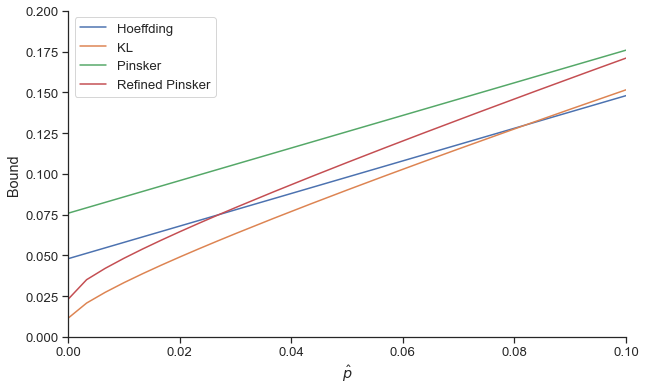

In [13]:
fig, axs = plt.subplots(1,1,figsize = (10,6))

axs.plot(p_emp,np.minimum(bound_hoeffding,1),label = "Hoeffding")
axs.plot(p_emp,np.minimum(bound_kl,1),label = "KL")
axs.plot(p_emp,np.minimum(bound_pinsker,1),label = "Pinsker")
axs.plot(p_emp,np.minimum(bound_refined_pinsker,1),label = "Refined Pinsker")
axs.set_xlim(0,0.1)
axs.set_ylim(0,0.2)
axs.set_ylabel("Bound")
axs.set_xlabel("$\hat{p}$")
axs.legend()
sns.despine()
plt.show()


In [15]:
lower_bound_kl = binary_search(p_emp,delta,n,higher = False)


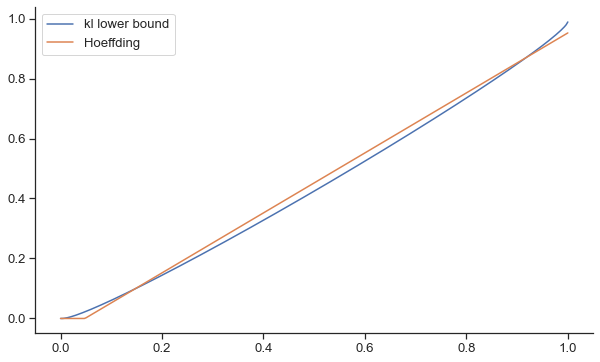

In [18]:
fig, axs = plt.subplots(1,1,figsize = (10,6))
axs.plot(p_emp,lower_bound_kl,label = "kl lower bound")
axs.plot(p_emp,np.maximum(0,p_emp -(bound_hoeffding - p_emp)), label = "Hoeffding")
axs.legend()
sns.despine()
plt.show()